Part B Assignment 4
<h1>K-means clustering on the Iris dataset</h1>
<h4> Name : Ayan Gadpal <br> Roll No. 43308 </h4>
K-Means clustering is one of the simplest and most commonly used clustering algorithms. It tries to find cluster centers that are representative of certain regions of the data. The algorithm alternates between two steps: assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it. The algorithm is finished when the assignment of instances to clusters no longer changes.

K-Means has the advantage that it’s pretty fast, as all we’re really doing is computing the distances between points and group centers. It thus has a linear complexity O(n)

## Step 1 : Load Dataset
We will first load the dataset and split it

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets

In [12]:
iris=datasets.load_iris()
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [13]:
df=pd.DataFrame({'x':iris.data[:,0],
                'y':iris.data[:,1],
                'cluster':iris.target})


## Step 2 : Model Building
The task is to decide how many cluster do we need to get best modeling of the data

We Will use **Elbow method** to select appropiate number of clusters
This method looks at the **percentage of variance** explained as a function of the number of clusters

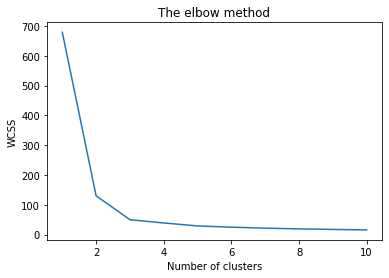

In [14]:
#Finding the optimum number of clusters for k-means classification
x = dataset.iloc[:, [1, 2, 3, 4]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

As we can see the "Elbow" is formed on 3 cluster (X-axis), We will use 3 as our total number of clusters

## Step 3 : Apply K-mean 

In [15]:
centroids={}
for i in range(3):
    res=[]
    res.append(df.loc[df["cluster"]==i]["x"].mean())
    res.append(df.loc[df["cluster"]==i]["y"].mean())
    centroids[i]=res

In [16]:
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

### Visualize

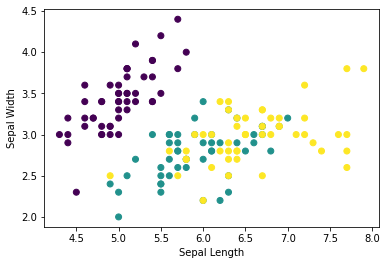

In [18]:
# fig=plt.figure(figsize=(5,5))
plt.scatter(df["x"],df["y"],c=iris.target)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

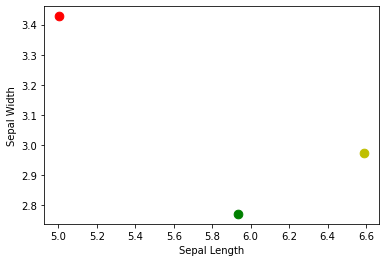

In [19]:
centers={0:'r',1:'g',2:'y'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1],s=75,color=centers[i])    
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

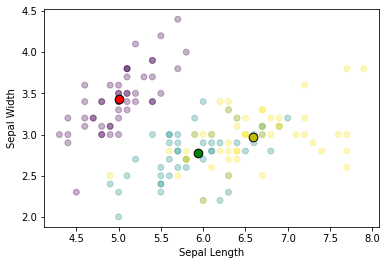

In [20]:
plt.scatter(df["x"],df["y"],c=iris.target,alpha=0.3)
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1],color=centers[i],s=75,edgecolors="black")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


### Calculate the closest points to the centroids and assigning the new clusters

In [23]:
def assignment(df, centroids):
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (np.sqrt((df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2))
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: centers[x])
    return df

In [31]:
df=assignment(df,centroids)
df.head()

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.118406,1.051594,1.764836,0,r
1,4.9,3.0,0,0.440931,0.926140,1.914215,0,r
2,4.7,3.2,0,0.381602,1.187514,2.116492,0,r
3,4.6,3.1,0,0.521939,1.242335,2.212913,0,r
4,5.0,3.6,0,0.172105,1.192508,1.887407,0,r


### Calculate new Centroids

In [25]:
def update():
    for i in range(3):
        centroids[i][0] = df.loc[df["closest"]==i]["x"].mean()
        centroids[i][1] = df.loc[df["closest"]==i]["y"].mean()

In [26]:
update()
centroids

{0: [5.00943396226415, 3.383018867924529],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333331, 3.0687499999999996]}

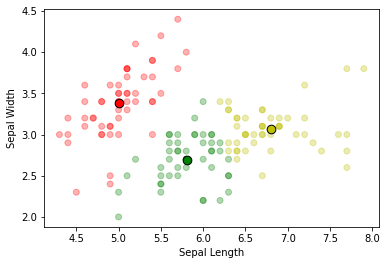

In [27]:
plt.scatter(df['x'],df['y'],color=df["color"],alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color=centers[i],s=75,edgecolors="k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

### Continue until all assigned clusters do not change

In [28]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    update()
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

## Step 4 : Visualize the result

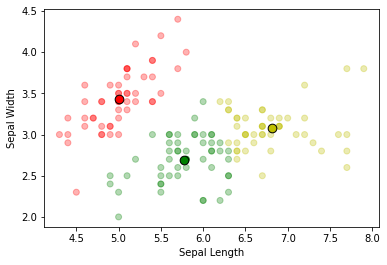

In [29]:
plt.scatter(df['x'],df['y'],color=df["color"],alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color=centers[i],s=75,edgecolors="k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()